# Class 9 

# More Pandas : 

# Time Series 

As we talked about during last week’s class Pandas is a very rich package that enables us to conduct many types of analysis, wrangling and visualizations. Working with data, formats like CSV’s , Geojsons and Shapefiles is made easy and so much less intimidating by the use of a few pretty simple command lines! 

Last week we have seen that functions like summarizing, describing as well as making changes in the initial data are very straight forward in Pandas.

Today, we will learn how to use more Pandas' functionalities. We will use these in conjunction with other packages as well as with other Pandas functionalists we used last week. Acknowledging that things are intertwined, in the next few weeks we will build our knowledge of working with different Python packages. We will also use more and more functionalities and commands with time while also using the simple functions. This method will hopefully help us build strong data analytics programming knowledge that you can use in your future academic studies and careers 📊📈

In [5]:
#runing packages 
import pandas as pd #<-- we know this one 
import numpy as np
import matplotlib #<-- for viz
import matplotlib.pyplot as plt#<-- for viz
from datetime import datetime #<-- note this one is for our time series analysis 
import seaborn as sns 

Note about data choice: this class and last class I decided to focus on working on COVID-19 data. As we are in the middle of this difficult period I am hopping that working with relevant data would be a good way to learn data analysis tools, as well as to gain information on the ongoing situation. I am happy to adjust to other topics, please feel free to provide feedback at any time!

### Data: 

Today we will work with a world wide data about COVID-19 from "Our World in Data: https://ourworldindata.org
 

In [8]:
#first load all cases csv: 

all_cases = pd.read_csv('total_cases.csv')

In [9]:
# let's get some basic info: 
all_cases.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
90,2020-03-30,715353,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,...,19522,143025,30.0,309.0,145.0,6.0,119.0,228.0,29.0,7.0
91,2020-03-31,777796,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,...,22141,164620,NaN,320.0,149.0,6.0,135.0,229.0,35.0,7.0
92,2020-04-01,851308,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,...,25150,189618,30.0,338.0,173.0,6.0,135.0,229.0,35.0,8.0
93,2020-04-02,928436,192.0,259.0,847.0,390.0,8.0,2.0,7.0,1133.0,...,29474,216721,30.0,338.0,187.0,6.0,143.0,235.0,36.0,8.0
94,2020-04-03,1000249,235.0,277.0,847.0,428.0,8.0,3.0,9.0,1133.0,...,33718,245540,33.0,369.0,190.0,6.0,144.0,239.0,39.0,8.0


In [10]:
all_cases.shape

(95, 205)

There are 95 rows (days) and rows, which are 205 countries in total 

## Task 1: 

## a.
    
 What is the total number of cases in:
 - Argentina
 - United Kingdom 
 - Italy 
 - Spain 
 - United States
 
  
   
   Hint: remember that the last day in this data is April 3rd 2020 and that the data is accumlated day by day

In [103]:
#your code here: 



## b. What is the ratio of total cases between:
* Brazil and France 
* South Africa and United Kingdom 

In [12]:
# transpose the data:
# april3T = april3rd.T
# april3T[4:10]


### Now let's create some visualizations 

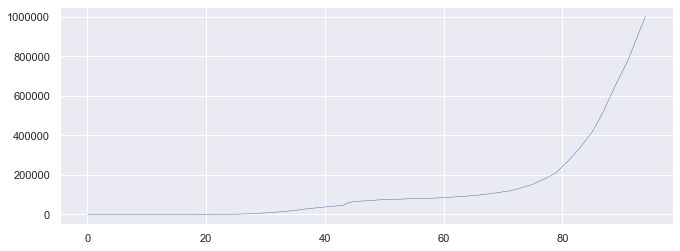

In [64]:
#first let's start with an overall world trend
sns.set(rc={'figure.figsize':(11, 4)})
all_cases['World'].plot(linewidth=0.5);

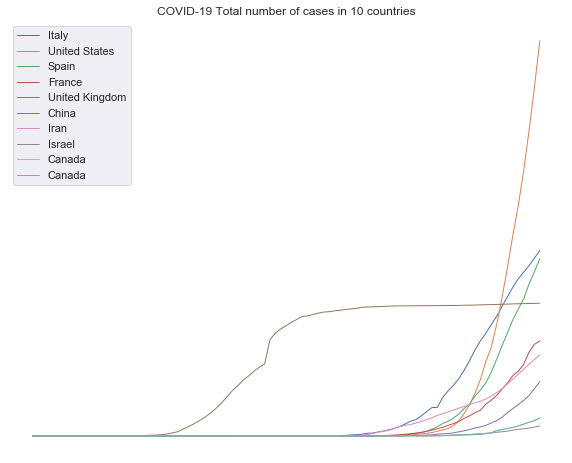

In [65]:
#set the figure size
sns.set(rc={'figure.figsize':(10, 8)})
#visualize countries:
all_cases['Italy'].plot(linewidth=1);
all_cases['United States'].plot(linewidth=1);
all_cases['Spain'].plot(linewidth=1);
all_cases['France'].plot(linewidth=1);
all_cases['United Kingdom'].plot(linewidth=1);
all_cases['China'].plot(linewidth=1);
all_cases['Iran'].plot(linewidth=1);
all_cases['Israel'].plot(linewidth=1);
all_cases['Canada'].plot(linewidth=1);
all_cases['Canada'].plot(linewidth=1);

#add legend:
plt.legend(loc="upper left")

#remove the grid and axis 
plt.axis('off')

#add title
plt.title('COVID-19 Total number of cases in 10 countries')

plt.show()

# Time Series 

Time series data is a useful form of data for many fields like climate change, finance, and urban informatics as well as many many others! The importance of time series data stems from the value that comes from understanding how things change over time. This temporal dimension means we need to have data that appears in *regular* intervals in order to treat it as time series. In the age of big data we often see data that is recorded (usually by sensors) in very small intervals, every second or every minute. By being able to conduct time series analysis we can smooth the data and understand it on a higher level. 


To get started with we will first look for the a time stamp in our data. In our data, as well as others the *data* column will be the one to look into. 

In [66]:
all_cases.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe,USrolling_mean,Italyrolling_mean,Chinarolling_mean,Iranrolling_mean,UKrolling_mean
90,2020-03-30,715353,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,...,6.0,119.0,228.0,29.0,7.0,147046.571429,96471.857143,82131.428571,38449.857143,19939.571429
91,2020-03-31,777796,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,...,6.0,135.0,229.0,35.0,7.0,169839.285714,101429.428571,82222.571429,41458.714286,23091.000000
92,2020-04-01,851308,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,...,6.0,135.0,229.0,35.0,8.0,NaN,NaN,NaN,NaN,NaN
93,2020-04-02,928436,192.0,259.0,847.0,390.0,8.0,2.0,7.0,1133.0,...,6.0,143.0,235.0,36.0,8.0,NaN,NaN,NaN,NaN,NaN
94,2020-04-03,1000249,235.0,277.0,847.0,428.0,8.0,3.0,9.0,1133.0,...,6.0,144.0,239.0,39.0,8.0,NaN,NaN,NaN,NaN,NaN


Yes, 'date' does seem to be our time column.

In [67]:
all_cases['date']

0    2019-12-31
1    2020-01-01
2    2020-01-02
3    2020-01-03
4    2020-01-04
        ...    
90   2020-03-30
91   2020-03-31
92   2020-04-01
93   2020-04-02
94   2020-04-03
Name: date, Length: 95, dtype: datetime64[ns]

In [17]:
#now let's check the dtypes for the "date" column
all_cases.dtypes

date            object
World            int64
Afghanistan    float64
Albania        float64
Algeria        float64
                ...   
Vatican        float64
Venezuela      float64
Vietnam        float64
Zambia         float64
Zimbabwe       float64
Length: 205, dtype: object

We see ״date״ is object type, we'd need to transform it to a datetime format so that Python will know how to read it using time series analysis. 

# Converting the ״Date״ column into a datetime format
Here are some of the Datetime formats for future reference: 
- %Y four digit year (e.g. 2019)
- %y two-digit year  (w.g. 19)
- %m two-digit month  (e.g. 03, 05)
- %H hour, 24-hour clock (e.g. 23, 00)
- %I hour, 12 hour clock (e.g. 11,12)
- %M two-digit minute (e.g. 00,59)
- %S seconds (e.g. 00,01)
- %w weekday as integer (e.g. 0 for sunday)
- %U week # (in a year) when Sunday is the 1st day
- %W week # (in the year) when Monday is the 1st day in a week
- %z UTC time Zone
- %F shortcut for %Y-%m-%d which is a very common datetime (e.g. 2020-04-04)
- %D shortcus for another common structure: %m/%d/%y (e.g. 04/04/20)

Source: Python for Data Analysis by Wes McKinney

In [18]:
#the Datetime package has calender realted functions, for exmaple, it can tell you the time right now:
datetime.now()

datetime.datetime(2021, 4, 3, 18, 27, 0, 878068)

In [68]:
# you can also calculate number of days between two dates: 
datetime(2019,12,7)-datetime(2019,10,8)

datetime.timedelta(days=60)

looking into our "date" column we see that ours is structured as follows: year(4 digits)-month-day. So if we look into the datetime formates above, we see that in Datetime language, we can translate it into: %Y-%m-%d OR %F



In [69]:
#Now for us to be able to change the date column into a datetime, we need to understand the format. 
#let's transform the date column from string into datetime format
all_cases['date'] = pd.to_datetime(all_cases['date'], format="%Y-%m-%d")

In [70]:
#now let's run this command again and see if our reformating worked
all_cases.dtypes

date                 datetime64[ns]
World                         int64
Afghanistan                 float64
Albania                     float64
Algeria                     float64
                          ...      
USrolling_mean              float64
Italyrolling_mean           float64
Chinarolling_mean           float64
Iranrolling_mean            float64
UKrolling_mean              float64
Length: 210, dtype: object

We see indeed that the "date" column has not been changed to a datetime type. 


Note that time series behaves like any other pandas series so we can do stuff like:

In [84]:
all_cases['date'].tail()

90   2020-03-30
91   2020-03-31
92   2020-04-01
93   2020-04-02
94   2020-04-03
Name: date, dtype: datetime64[ns]

In [76]:
all_cases['date'].min()

Timestamp('2019-12-31 00:00:00')

In [77]:
all_cases['date'].max()

Timestamp('2020-04-03 00:00:00')

In [78]:
len(all_cases['date'])

95

## Why should we be "smoothing" data?

One of the reasons time series data is very useful is due to the "smoothing" of data. Smoothing a dataset means removing outliers and seeing the general trend rather than the value for each single datapoint. There are a few different ways to smooth data. Today we will look into a very common method for smoothing--rolling mean (AKA moving windows). 

## Rolling Mean

Rolling means are a way to calculate local averages for the purpose of smoothing the data. In this method, instead of calculating one average for the entire data, the average is calcualted in constant intervals. Using rolling means in time series is very common. The main reason is that timeseries include a large amount of observations. By displaying rolling means instead of the actual data, we can show trends. 

In statistics, rolling means are used for predictions (e.g. ARIMA). We will not touch upon this topic today. 

Let's try calculating rolling mean for our data: 

In [79]:
# let's calculate the rolling mean for the United States cases 

# here I am creating the local mean for intervals of 4 (in our case every 4 days). 
#In larger datasets we might apply larger intervals 
all_cases['USrolling_mean'] = all_cases['United States'].rolling(7, center=True).mean()
# now let's view our new column  
all_cases['USrolling_mean'].tail()

90    147046.571429
91    169839.285714
92              NaN
93              NaN
94              NaN
Name: USrolling_mean, dtype: float64

In [82]:
#let's look into the rolling mean column in comparison to the actual cases per data:
print ('US cases', all_cases['United States'][30:34])
print ('Rolling mean in the US', all_cases['USrolling_mean'][30:34])

US cases 30    5
31    6
32    7
33    8
Name: United States, dtype: int64
Rolling mean in the US 30    5.857143
31    6.714286
32    7.571429
33    8.428571
Name: USrolling_mean, dtype: float64


We see that these are both mostly similiar, but that the rolling mean is "moving" a little slower. 
Let's visualize both the number of cases per day and the rolling mean for the US:

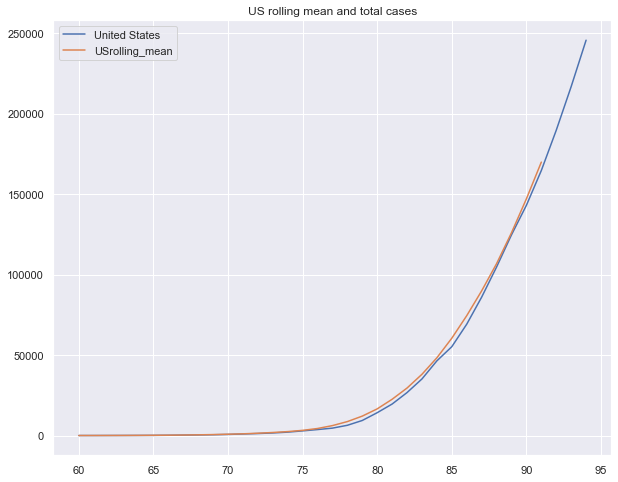

In [85]:
sns.set(rc={'figure.figsize':(10, 8)})
#all_cases['World'].plot(linewidth=0.5);
#all_cases['Vietnam'].plot(linewidth=0.5);

all_cases['United States'][60:].plot(linewidth=1.5);
all_cases['USrolling_mean'][60:].plot(linewidth=1.5);
plt.legend(loc="upper left")
plt.title('US rolling mean and total cases')


plt.show()


In [86]:
# let's do the same for other countries
all_cases['Italyrolling_mean'] = all_cases['Italy'].rolling(7, center=True).mean()
all_cases['Chinarolling_mean'] = all_cases['China'].rolling(7, center=True).mean()
all_cases['Iranrolling_mean'] = all_cases['Iran'].rolling(7, center=True).mean()
all_cases['UKrolling_mean'] = all_cases['United Kingdom'].rolling(7, center=True).mean()


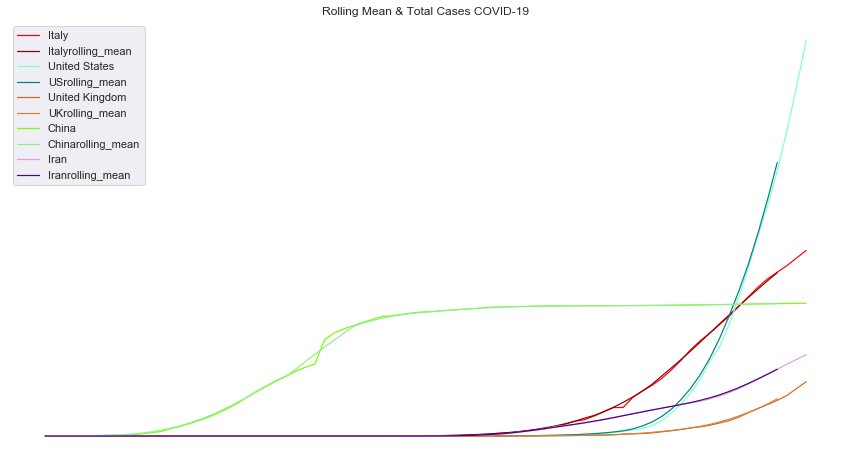

In [87]:
sns.set(rc={'figure.figsize':(15, 8)})


#italy
all_cases['Italy'][15:].plot(linewidth=1.2, c='red');
all_cases['Italyrolling_mean'][15:].plot(linewidth=1.2, c='darkred');

#US
all_cases['United States'][15:].plot(linewidth=1.2, c='aquamarine');
all_cases['USrolling_mean'][15:].plot(linewidth=1.2, c='teal');

#uk
all_cases['United Kingdom'][15:].plot(linewidth=1.2, c='chocolate');
all_cases['UKrolling_mean'][15:].plot(linewidth=1.2, c='peru');

#china
all_cases['China'][15:].plot(linewidth=1.2, c='lawngreen');
all_cases['Chinarolling_mean'][15:].plot(linewidth=1.2, c='lightgreen');

#iran
all_cases['Iran'][15:].plot(linewidth=1.2, c='plum');
all_cases['Iranrolling_mean'][15:].plot(linewidth=1.2, c='indigo');

#add title
plt.title('Rolling Mean & Total Cases COVID-19')

#add legend
plt.legend(loc="upper left")

#remove axis
plt.axis('off')

plt.show()



Note that I used two tones of the same color for each country's number of cases and its rolling mean. As the legend indicates, the lighter color is represents the actual cases, and the lighter color represents the rolling mean. 

# Rolling Mean on NYT data
Now let's try the same tool for 
The NYT data we used last week:. Last updated on April 5th
https://github.com/nytimes/covid-19-data

In [88]:
US_cases = pd.read_csv('us-states.csv')

In [90]:
US_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [91]:
covidNY = US_cases[US_cases['state']== 'New York']

In [92]:
#once again creating a new column to count number of new cases per day
new_cases = []
previous_count = 0
for i in range(len(covidNY.cases)):
    current_count = covidNY.cases.iloc[i]
    new_cases.append(current_count - previous_count)
    previous_count = current_count
    
#and add it as a column 

covidNY['new_cases'] = new_cases

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [93]:
new_deaths = []
previous_count = 0
for i in range(len(covidNY.deaths)):
    current_count = covidNY.deaths.iloc[i]
    new_deaths.append(current_count - previous_count)
    previous_count = current_count
    
covidNY['new_deaths'] = new_deaths

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
covidNY.tail(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
21277,2021-03-24,New York,36,1814919,49231,20184,254
21332,2021-03-25,New York,36,1823602,49305,8683,74
21387,2021-03-26,New York,36,1831605,49363,8003,58
21442,2021-03-27,New York,36,1840338,49446,8733,83
21497,2021-03-28,New York,36,1849190,49537,8852,91
21552,2021-03-29,New York,36,1858162,49648,8972,111
21607,2021-03-30,New York,36,1863912,49696,5750,48
21662,2021-03-31,New York,36,1871595,49790,7683,94
21717,2021-04-01,New York,36,1880768,49872,9173,82
21772,2021-04-02,New York,36,1888823,49946,8055,74


# Task 2: 
## a. 
- What was the largest number of cases and deaths in one day in NYS?
- In which dates were these numbers recorded? 

## b. 
- Which state/s have the largest cumulative number of cases and deaths? 

In [38]:
# your code: 


# Time series for NY data:

Similiar to the world data let's visualize the NY data as time series: 

In [39]:
#how many days in the data?
len(covidNY)

398

In [40]:
# tranform data column into datetime
#let's transform the date column into datetime format
covidNY['date'] = pd.to_datetime(covidNY['date'], format="%Y-%m-%d")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
covidNY.dtypes

date          datetime64[ns]
state                 object
fips                   int64
cases                  int64
deaths                 int64
new_cases              int64
new_deaths             int64
dtype: object

In [42]:
#make sure it works: 

covidNY['date'].dtypes

dtype('<M8[ns]')

In [43]:
covidNY['NYrolling_mean'] = covidNY['cases'].rolling(4, center=True).mean()
covidNY['NYrolling_mean'].tail()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


21552    1852900.50
21607    1860714.75
21662    1868609.25
21717    1876274.50
21772           NaN
Name: NYrolling_mean, dtype: float64

(-830.3, 22848.3, -94440.1, 1983264.1)

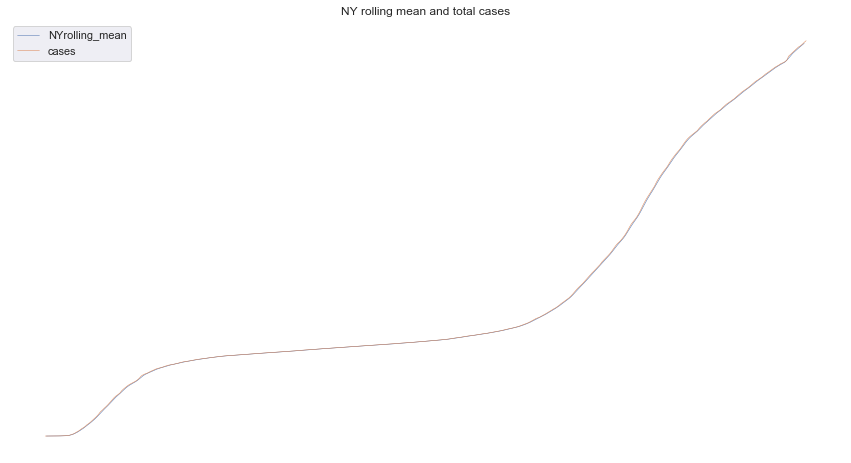

In [44]:
#visualize NY rolling mean and total cases: 
covidNY['NYrolling_mean'].plot(linewidth=0.5);
covidNY['cases'].plot(linewidth=0.5);
plt.title('NY rolling mean and total cases')
plt.legend(loc="upper left")
plt.axis('off')

# Time Series for Frocasting: 

Many fields use timeseires analysis for forcasting. That means that looking into a specific period there might be a way to predict the future. That assumes that the "history repeats itself". But is that always true? Are the trends we are seeing with COVID-19 cases and deaths are likely to repeat themselves? Given social distanincing and that most of us chaged our lives completly in the past few weeks, we are now still seeing cases and deaths that are likely the result of contamination from 2-3 weeks ago. Another element is that we only have data from 36 days (since the 1st case). 36 days are not enough to really understand trends and being able to predict unsing timeseries analysis. In addition we still can not understand seasonality, which usually is a key to foracsting in timeseries analysis.  

To understand this issue even better we will look into both the deaths and the cases' daily counts. 

(-830.3, 22848.3, -1009.2, 21193.2)

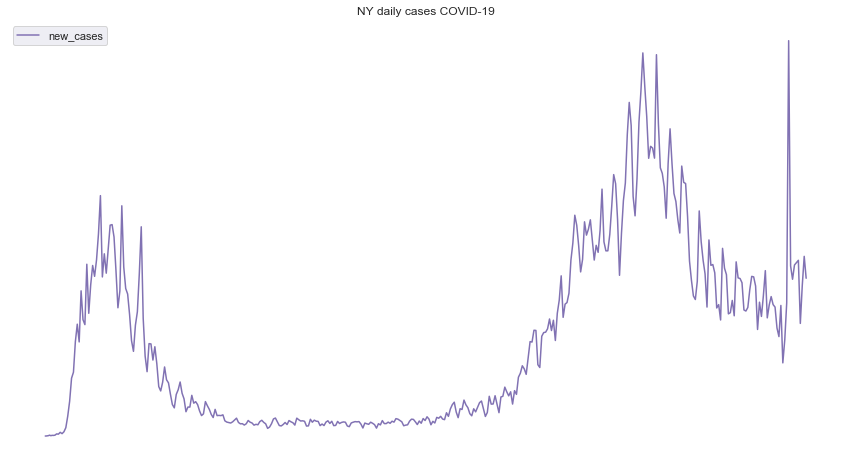

In [45]:
#covidNY['']

covidNY['new_cases'].plot(linewidth=1.5, c='m');
#covidNY['new_deaths'].plot(linewidth=1.5, c='C');

plt.title('NY daily cases COVID-19')

plt.legend(loc="upper left")
plt.axis('off')
#covidNY['cases'].plot(linewidth=0.5);

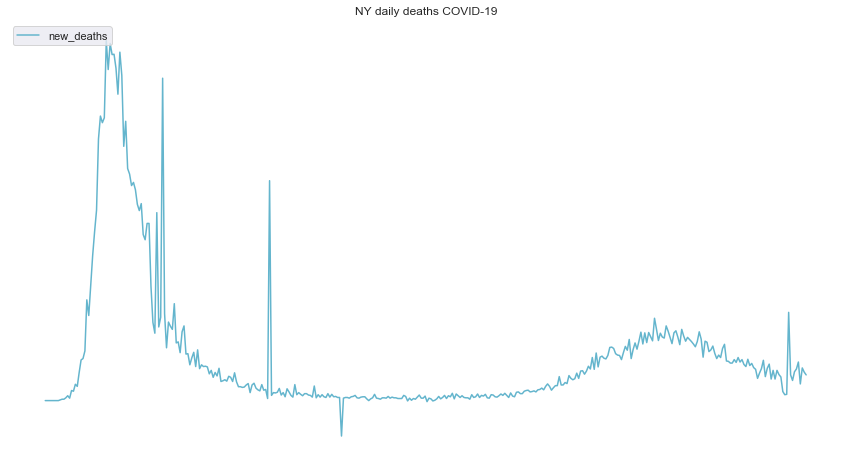

In [47]:
covidNY['new_deaths'].plot(linewidth=1.5, c='C');
plt.title('NY daily deaths COVID-19')
plt.legend(loc="upper left")
plt.axis('off')
plt.show()

Conclusion: we see that so far, there has been an overall trend of increase in cases. However, there have been also a few days with sudden dip and than an increase. It seems like at this point we just don't have enough data points to predict the next few days. 